# Linear Regression

In this lab we would be going through:
 - Simple linear regression
 - Multiple linear regression 
 - Interaction Terms
 - Non-linear Transformation of the Predictors

We would be working with the Boston data set available in package ISLR2. <br>

In [1]:
library(ISLR2)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


Lets try using `lstat` as the predictor variable to predict the value `medv` using a `lm()` model

In [2]:
#To know more about lm( );
#?lm()

In [3]:
lm.fit <- lm(medv ~ lstat, data = Boston)
lm.fit


Call:
lm(formula = medv ~ lstat, data = Boston)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


In [4]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We can extract the coefficients of the fit by using `lm.fit$coefficient` or also by using the extractor functions like `coef()`

Similarly, to get the confidence interval for the coefficient estimates, we can use the `confint()` function

In [5]:
coef(lm.fit) #to get the coefficients
confint(lm.fit) #to get the confidence interval

(Intercept)       lstat 
 34.5538409  -0.9500494

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The `predict()` function can be used to produce confidence intervals and prediction intervals for the prediction of `medv` for a given value of `lstat`.

In [6]:
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))), interval = "confidence")
predict(lm.fit, data.frame(lstat = (c(5, 10, 15))),interval = "prediction")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


These values imply that, the 95 % confidence interval associated with a `lstat` value of 10 is (24.47, 25.63), and the 95 % prediction interval is (12.828, 37.28). 

As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 25.05 for `medv` when `lstat` equals 10), but the latter are substantially wider.

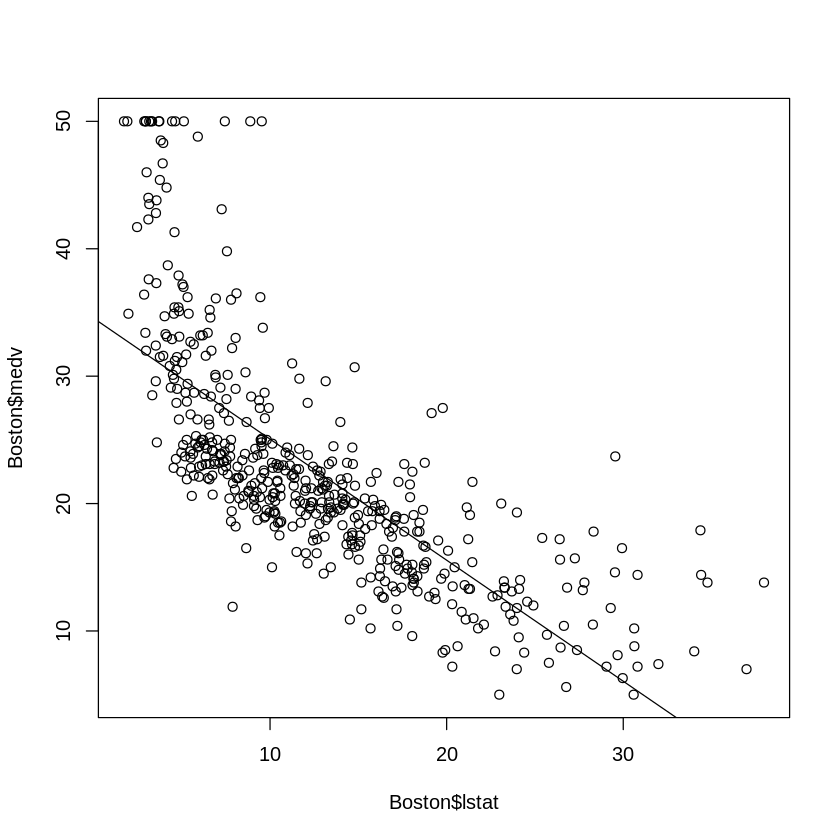

In [7]:
plot(Boston$lstat, Boston$medv)
abline(lm.fit)

Plotting the points and an `abline` of the fit, we can observe evidences for non-linearity in the relationship between `lstat` and `medv`.

## Multiple Linear Regression

The syntax `lm(y ∼ x1 + x2 + x3)` is used to fit a model with three predictors, `x1`, `x2`, and `x3`. 

The `summary()` function now outputs the regression coefficients for all the predictors.

In [17]:
# #fit a model that responds medv with lstat and age as predictors  
# lm.multiple.fit = function(){
#     # your code here

# #     return (summary(lm.fit <- lm(medv ~ lstat, data = Boston)))
#     lm.fit <- lm(medv ~ lstat + age, data = Boston)
#     return(summary(lm.fit))
# }

# lm.multiple.fit()


lm.multiple.fit <- function() {
  lm.fit <- lm(medv ~ lstat + age, data = Boston)
  return(lm.fit)
}

model <- lm.multiple.fit()  # Store the lm object in a variable
summary <- summary(model)  # Get the summary of the model
residuals <- summary$residuals
model



Call:
lm(formula = medv ~ lstat + age, data = Boston)

Coefficients:
(Intercept)        lstat          age  
   33.22276     -1.03207      0.03454  


In [18]:
# Test residuals of the model
residuals = summary(lm.multiple.fit())$residuals
stopifnot(length(summary(lm.multiple.fit())$residuals) == 506)
stopifnot(round(median(residuals),2)== -1.28) #median of residuals
stopifnot(round(max(residuals),2)== 23.16)    #max of residuals

#Test Coefficients of the models
coefficients = summary(lm.multiple.fit())$coefficients
stopifnot(round(coefficients[2],2) == -1.03) #lstat estimate
stopifnot(round(coefficients[3],2) == 0.03)  #age estimate

The `Boston` data set contains 12 variables, and so it would be cumbersome to have to type all of these in order to perform a regression using all of the predictors.

Instead, we can use the following short-hand:

In [19]:
lm.fit = lm(medv~., data = Boston)
summary(lm.fit)


Call:
lm(formula = medv ~ ., data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.1304  -2.7673  -0.5814   1.9414  26.2526 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  41.617270   4.936039   8.431 3.79e-16 ***
crim         -0.121389   0.033000  -3.678 0.000261 ***
zn            0.046963   0.013879   3.384 0.000772 ***
indus         0.013468   0.062145   0.217 0.828520    
chas          2.839993   0.870007   3.264 0.001173 ** 
nox         -18.758022   3.851355  -4.870 1.50e-06 ***
rm            3.658119   0.420246   8.705  < 2e-16 ***
age           0.003611   0.013329   0.271 0.786595    
dis          -1.490754   0.201623  -7.394 6.17e-13 ***
rad           0.289405   0.066908   4.325 1.84e-05 ***
tax          -0.012682   0.003801  -3.337 0.000912 ***
ptratio      -0.937533   0.132206  -7.091 4.63e-12 ***
lstat        -0.552019   0.050659 -10.897  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

## Interaction Terms

It is easy to include interaction terms in a linear model using the `lm()` function.
 - `lstat:black` (tells `R` to include an interaction term between `lstat` and `black`)
 - `lstat * age` (`lstat` + `age` + `lstat:age`)

In [36]:
#Fit a lm model that responds with lstat, age and their interaction as predictors
lm.interaction.fit = function(){
    # your code here
    model <- lm(medv ~ lstat * age, data = Boston)
    return(model) 
}

In [37]:
interaction.summary = summary(lm.interaction.fit())
interaction.summary$coefficients

stopifnot(length(interaction.summary$coefficients) == 16) #intercept, lstat, age and lstate:age

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),36.0885359346,1.469835463,24.55277263,4.907116e-88
lstat,-1.3921168406,0.167455532,-8.31335236,8.780730e-16
age,-0.0007208595,0.019879171,-0.03626205,9.710878e-01
lstat:age,0.0041559518,0.001851795,2.24428275,2.524911e-02


## Non-linear Transformations of the Predictors

The `lm()` function can also accommodate non-linear transformations of the predictors. For instance, given a predictor `X`, we can create a predictor `X^2` using `I(X^2)`. 

The function `I()` is needed since the `^` has a special meaningin a formula object; wrapping as we do allows the standard usage in `R`, which is to raise `X` to the power 2.

In [38]:
lm.transform.fit = lm(medv~lstat + I(lstat^2), data=Boston)

In [39]:
summary(lm.transform.fit)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In order to create a cubic fit, we can include a predictor of the form `I(X^3)`. 

However, this approach can start to get cumbersome for higher- order polynomials. A better approach involves using the `poly()` function to create the polynomial within `lm()`

In [40]:
# Fit a regression model that would respond medv with an lstat polynomial of degree 4 as predictor
#?poly(); to understand more about poly function


lm.poly.fit <- function() {
  degree <- 4
  lstat_poly <- poly(Boston$lstat, degree, raw = TRUE)
  model <- lm(medv ~ lstat_poly, data = Boston)
  return(model)
}


In [41]:
# Test - check the number of coefficients that are considered in the curve
fit = lm.poly.fit()
stopifnot(length(summary(fit)$coefficients) == 20) # 1- intercept; 4 - variables against 4 columns

We use the `anova()` function to further quantify the extent to which the quadratic fit is superior to the linear fit.


In [42]:
anova(lm.fit, lm.transform.fit)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,493,11349.42,NA,NA,NA,NA
2,503,15347.24,-10,-3997.824,17.36589,3.822984e-27
